# Proyecto – Entrega 2 

**Curso:** CI-0115  
**Profesor:** Sebastián Ruiz Blais  
**Semestre:** I-2024  
**Grupo:** 3  
**Estudiantes:**  
- Ignacio Redondo Alfaro C06420  
- Braunny Madrigal Barrantes C24436  

---

## 0.

Preprocesar y filtrar la base de datos. Se deja limpia para su uso en los puntos siguientes.

---

In [1]:

# --------------------------IMPORTING PACKAGES----------------------------------------------------------------------------

# Data manipulation and analysis
import pandas as pd

# Plotting and visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Statistical analysis
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Math
import numpy as np  # to manipulate a matrix
import math  # to calc the square root

#-------------------------------------------------------------------------------------------------------------------------

#------------------------CREATING A SPEC DATASET BASED ON A GIVEN FILEPATH------------------------------------------------

my_data = pd.read_csv('world_development.csv', sep = ',', skipinitialspace = True)

#-------------------------------------------------------------------------------------------------------------------------

#------------------------------------DROP DATAFRAME SPECIFIC COLUMNS IN A RANGE-------------------------------------------

def drop_columns_in_range(data, column_start, column_end):
    data = data.drop(data.columns[column_start:column_end], axis=1)
    return data

#-------------------------------------------------------------------------------------------------------------------------

#------------------------------DROP EVERY ROW THAT CONTAINS A NAN VALUE ON SPECIFIC COLUMN TITLE--------------------------

def drop_nan_rows_in_spec_col(data, column_title):
    data = data.dropna(subset=[column_title])
    return data

#-------------------------------------------------------------------------------------------------------------------------

#----------------------DROP EVERY ROW OUTSIDE THE FIRST INDEX ROWS PATTERN------------------------------------------------

def drop_rows_outside_of_pattern(data, rows_to_keep, number_unique_rows, number_set_rows):
    # Create a new DataFrame to store the results
    final_data = pd.DataFrame()
    
    # Repeat the process for each set of number_unique_rows
    for i in range(number_set_rows):
        # Calculate the base index of the rows for this iteration
        base_index = i * number_unique_rows
        # Add the indexes of the rows to keep for this iteration, considering the offset
        rows_to_keep_shifted = [idx + base_index for idx in rows_to_keep]
        # Select and add the rows to keep to the final DataFrame
        final_data = pd.concat([final_data, data.loc[rows_to_keep_shifted]])

    return final_data

#-------------------------------------------------------------------------------------------------------------------------

#------------------DROP ROWS IN A SPECIFIC COLUMN IF THE ROW VALUE IS NOT REPEATED AT LEAST N TIMES-----------------------

def drop_rows_in_speccol_that_appear_less_than_ntimes(data, spec_col, n_times):
    data = data.groupby(spec_col).filter(lambda x : len(x)>n_times)
    return data

#-------------------------------------------------------------------------------------------------------------------------

#-----------------REPLACE OLD LIST OF ROW NAMES IN SPEC COL WITH NEW LIST OF ROW NAMES------------------------------------

def replace_old_row_names_with_new_in_spec_col(data, spec_col, old_names, new_names):
    data[spec_col] = data[spec_col].replace(old_names, new_names)
    return data

#-------------------------------------------------------------------------------------------------------------------------

#------------------DIVIDE ROWS, STARTING IN START, MULTIPLES OF INCREMENT IN SPEC COL BY A GIVEN VALUE--------------------

def divide_spec_rows_in_col_by_val(data, spec_col, start, increment, value):
    num_rows = data.shape[0]
    i = start
    while(i < num_rows):
        data.at[i, spec_col] = data.at[i, spec_col] / value
        i += increment
    return data

#-------------------------------------------------------------------------------------------------------------------------

#--------------------------GET SPEC_INDICATOR VALUES ON EACH YEAR AND RETURN IT AS A LIST---------------------------------

def get_spec_indicator_values_on_each_year(data, spec_ind, list_return):
    for i in range (spec_ind, 760, 5):  # Starts iterating on the spec_ind value, that way passes for all years
        for j in range(2000, 2020):
            value = data.at[i, str(j)]
            list_return.append(value)
    return list_return

#-------------------------------------------------------------------------------------------------------------------------

#------------------------------------PREPROCESS---------------------------------------------------------------------------

def main_00():
    # Make a copy of the original data
    new_data = my_data.copy()
    # Drop columns from 4 to 44
    new_data = drop_columns_in_range(new_data, 3, 44)
    # Drop columns from 24 to 40
    new_data = drop_columns_in_range(new_data, 23, 40)
    # Drop column 1 (originally column 0)
    new_data = drop_columns_in_range(new_data, 1, 2)
    # Drop every row outside of the selected row. Useful when working with indicators on a single column
    new_data = drop_rows_outside_of_pattern(new_data, [1, 18, 34, 61, 67], 76, 266)
    # Drop rows with null values in the 'Country Name' column title
    new_data = drop_nan_rows_in_spec_col(new_data, 'Country Name')
    # Drop rows with null values in each one the selected years
    for i in range(2000, 2020):
        new_data = drop_nan_rows_in_spec_col(new_data, str(i))

    # Drop countries that are not repeated at least more than 4 times
    new_data = drop_rows_in_speccol_that_appear_less_than_ntimes(new_data, 'Country Name', 4)
    # Reset the DataFrame's indexes after dropping rows
    new_data.reset_index(drop=True, inplace=True)
    # Initialize both row names lists
    old_row_names = ['Población urbana', 'Extracción anual de agua dulce, total (en billones de metros cúbicos)', 'Emisiones de gases de efecto invernadero totales (kt de equivalente de CO2)', 'Acceso a la electricidad (% de población)', 'Área selvática  (kilómetros cuadrados)']
    new_row_names = ['Population_Millions', 'H2O_Extraction_Billions', 'GHG_Emissions_KT', 'Electricity_Access_%', 'Forest_Area_KM2']
    # Replace old_row_names with the new_row_names
    new_data = replace_old_row_names_with_new_in_spec_col(new_data, 'Indicator Name', old_row_names, new_row_names)
    # Divide the Indicator Population_Millions to make actually a population represented in millions
    for i in range(2000, 2020):
        new_data = divide_spec_rows_in_col_by_val(new_data,str(i), 0, 5, 1000000)

    # Lists with values on each new column title
    list_countries = []
    list_years = []
    list_pop = []
    list_water = []
    list_ghg = []
    list_elect = []
    list_forest = []

    # Get countries in the data frame
    for i in range(0, 760, 5):
        curr_country = new_data.iat[i, 0]
        for j in range(i, i+20):
            list_countries.append(curr_country)  # Repeat each country for the amount of years
          
    # Get each year on the dataframe
    for i in range(2000, 2020):
        list_years.append(i)
    list_years = 152*list_years  # Repeat each year for each country
    
    # Get Population_Millions value on each year
    list_pop = get_spec_indicator_values_on_each_year(new_data, 0, list_pop)
    # Get H2O_Extraction_Billions value on each year
    list_water = get_spec_indicator_values_on_each_year(new_data, 1, list_water)
    # Get GHG_Emissions_KT value on each year
    list_ghg = get_spec_indicator_values_on_each_year(new_data, 2, list_ghg)
    # Get Electricity_Access_% value on each year
    list_elect = get_spec_indicator_values_on_each_year(new_data, 3, list_elect)
    # Get Forest_Area_KM2
    list_forest = get_spec_indicator_values_on_each_year(new_data, 4, list_forest)

    # Create a new data frame which columns will be the different indicator names
    column_names = ['Country', 'Year', 'Population_Millions', 'H2O_Extraction_Billions', 'GHG_Emissions_KT', 'Electricity_Access_%', 'Forest_Area_KM2']
    my_dict = {column_names[0] : list_countries, column_names[1] : list_years, column_names[2] : list_pop, column_names[3] : list_water, column_names[4] : list_ghg, column_names[5] : list_elect, column_names[6] : list_forest}
    final_data = pd.DataFrame.from_dict(my_dict)
    # Sort the final data frame based on the column Year
    final_data = final_data.sort_values('Year')
    final_data = final_data.reset_index(drop=True)

    # Return the resulting data of this maniputalions. Now the dataframe has its variables of interest as column titles
    return final_data

#-------------------------------------------------------------------------------------------------------------------------

#----------------------INVOKE---------------------------------------------------------------------------------------------

my_data = main_00()

#-------------------------------------------------------------------------------------------------------------------------


## 1.

### Instrucción
Para esta entrega, continúe trabajando con la misma base de datos que la entrega anterior e incluya más bases de datos para enriquecer la cantidad de datos. Procure que las nuevas bases de datos puedan ser unificadas a las anteriores por medio de alguna columna en común.

### Resolución

Se agrega una base de datos que contiene el nombre de los países del mundo tanto en español como en inglés. Dicha base de datos también contiene códigos para identificar países. Esta base de datos es esencial incluirla, ya que en nuestra base de datos la columna que corresponde al nombre de países se encuentra en español y es muy poco común encontrar datasets en dicho idioma.

Obtenida de: https://gist.github.com/brenes/1095110#file-paises-csv


Se agrega una base de datos que contiene las emisiones de CO2 fósil a nivel global por país desde 2002 hasta 2022. Esta base de datos es relevante porque proporciona información crucial sobre las emisiones de CO2, que es un indicador importante del impacto ambiental y puede correlacionarse con otros indicadores económicos y de desarrollo. Además, contiene nombres de países y años que facilitan la unificación con nuestra base de datos principal.

Obtenida de: https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022


Se agrega una base de datos que contiene la producción de arroz por país desde 1961 hasta 2021. Esta base de datos es relevante porque la producción de arroz es un indicador clave de la actividad agrícola y de la seguridad alimentaria en muchos países. Además, proporciona una perspectiva superficial del estado de salud del suelo.

Obtenida de: https://www.kaggle.com/datasets/bharathposa/rice-production-by-country-from-1961-to-2021

---

In [2]:

#------------OBTAINING NEW DATA FRAME AND DOING PREPROCESSING------------------------------------------------------

my_countries = pd.read_csv('countries.csv', sep = ',', skipinitialspace = True)
my_rice =  pd.read_csv('rice_production.csv', sep = ',', skipinitialspace = True)
my_co2 = pd.read_csv('co2_emissions.csv', sep = ',', skipinitialspace = True)

# Drop useless columns
my_countries = my_countries[['nombre', 'name', 'iso3']]
my_rice = my_rice.drop(columns=['Unit', 'Flag', 'Flag Description']) 
my_co2 = my_co2.drop(columns=['ISO 3166-1 alpha-3', 'Total', 'Gas', 'Flaring', 'Other', 'Per Capita'])

#------------------------------------------------------------------------------------------------------------------

#------------MERGE MULTIPLE DATA FRAMES BY ONE COLUMN OR TWO-------------------------------------------------------

def main_01():
    # rename columns that will serve as reference
    new_data = my_data.rename(columns={"Country": "nombre"})
    new_co2 = my_co2.rename(columns={"Country": "nombre"})
    new_rice = my_rice.rename(columns={"Area": "nombre", "Value": "Rice_T"})
    
    # unify dataframes using one common column as reference
    new_data = new_data.merge(my_countries, on=['nombre'])
    
    # unify dataframes using two columns as reference
    new_data = new_data.merge(new_co2, on=['nombre', 'Year'])
    new_data = new_data.merge(new_rice, on=['nombre', 'Year'])

    # return
    return new_data

#------------------------------------------------------------------------------------------------------------------

#----------------------INVOKE---------------------------------------------------------------------------------------------

my_data = main_01()
print("Nueva Base de Datos")
print("\t\t(resultado de unir: world_development.csv, countries.csv, co2_emissions.csv y rice_production.csv)\n\n\n")
print(my_data.head)

#-------------------------------------------------------------------------------------------------------------------------


Nueva Base de Datos
		(resultado de unir: world_development.csv, countries.csv, co2_emissions.csv y rice_production.csv)



<bound method NDFrame.head of         nombre  Year  Population_Millions  H2O_Extraction_Billions  \
0    Indonesia  2000            89.914698                113.27000   
1      Senegal  2000             3.912769                  1.58995   
2    Australia  2000            16.028911                 21.65924   
3      Albania  2000             1.289391                  1.83780   
4      Uruguay  2000             3.029768                  3.66000   
..         ...   ...                  ...                      ...   
739  Indonesia  2019           150.925974                222.63500   
740   Portugal  2019             6.764658                  6.12953   
741     Angola  2019            21.410634                  0.70570   
742   Paraguay  2019             4.040715                  2.41300   
743    Albania  2019             1.747593                  1.13100   

     

## 2.

### Instrucción

Realice una lista de las preguntas que guían su análisis. Pueden ser algunas de las mismas anteriores y otras nuevas. Algunas preguntas deben buscar predecir una variable en función de una combinación de 2 o más variables (punto 4). Por ejemplo, la pregunta “si el día está soleado y es viernes de quincena, hay mayor compra de helados?” buscaría predecir una variable en función a dos variables. Otras preguntas deben buscar comparar entre distintas categorías de datos, como por ejemplo en los labs 3-4, se investigó si existen diferencias entre países en varios grupos de latitud y varios grupos de altitud. Deben haber por lo menos tres preguntas que comparen categorías y tres preguntas que combinen variables.

### Resolución

Lista de preguntas:
1. ¿Cómo se comporta la variable 'H2O_Extraction_Billions' según su categoría en 'Population_Size: Small, Medium, Large'?
2. ¿Cómo se comporta la variable 'Forest_Area_KM2' según su categoría en 'Population_Size: Small, Medium, Large'?
3. ¿Cómo se comporta la variable 'Rice_T' según su categoría en 'Population_Size: Small, Medium, Large'?
4. ¿Se puede predecir el comportamiento de la variable 'GHG_Emissions_KT' según el comportamiento de las variables ' Oil' y 'Coal'?
5. ¿Se puede predecir el comportamiento de la variable 'Rice_T' según el comportamiento de las variables 'H2O_Extraction_Billions' y 'Forest_Area_KM2'?
6. ¿Se puede predecir el comportamiento de la variable 'Population_Millions' según el comportamiento de las variables 'GHG_Emissions_KT' y 'Electricity_Access_%'?

---


## 3.

### Instrucción

Utilice diagramas de cajas para describir las distribuciones y gráficas de dispersión para las relaciones entre las variables de interés. Describa las distribuciones de todas las variables de interés (mínimo 5 variables) y comente sobre su distribución. Para las
relaciones, solamente enfoque las que sean más significativas (3 o más relaciones, que se relacionen con alguna pregunta).

### Resolución

Viejas variables de interes: 'Population_Millions', 'H2O_Extraction_Billions', 'GHG_Emissions_KT', 'Electricity_Access_%' y 'Forest_Area_KM2'.

Nuevas variables de interes: 'Population_Millions', 'H2O_Extraction_Billions', 'GHG_Emissions_KT', 'Electricity_Access_%', 'Forest_Area_KM2', 'Rice_T', 'Oil' y 'Coal'.

---


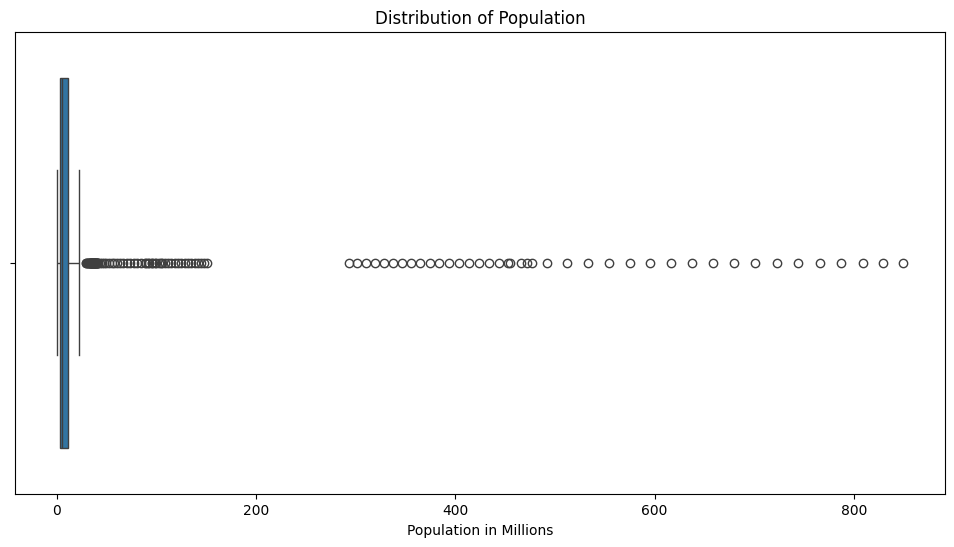

Se muestra la distribución de la población en millones.
Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.
Este patrón sugiere una distribución altamente sesgada hacia la derecha.





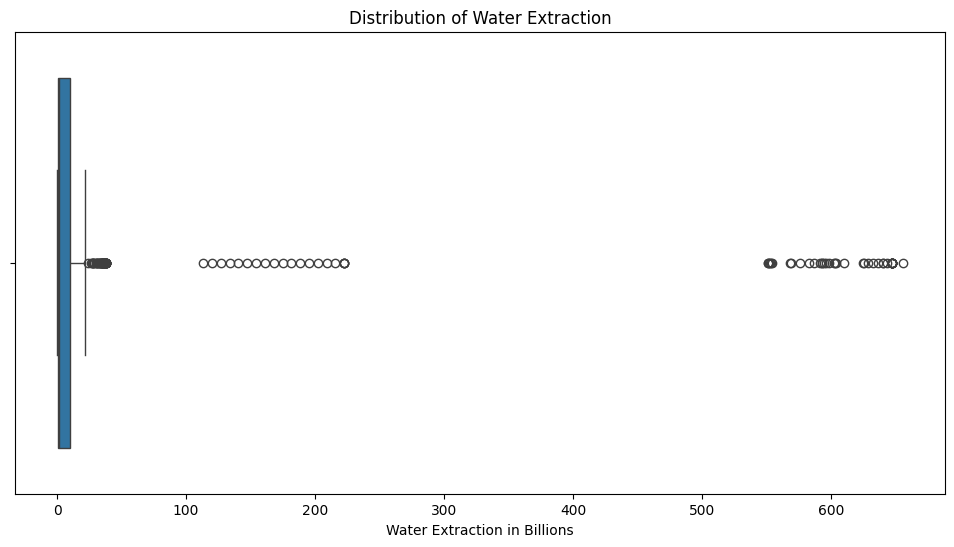

Se muestra la distribución de la extracción de agua en millardos.
Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.
Este patrón sugiere una distribución altamente sesgada hacia la derecha.





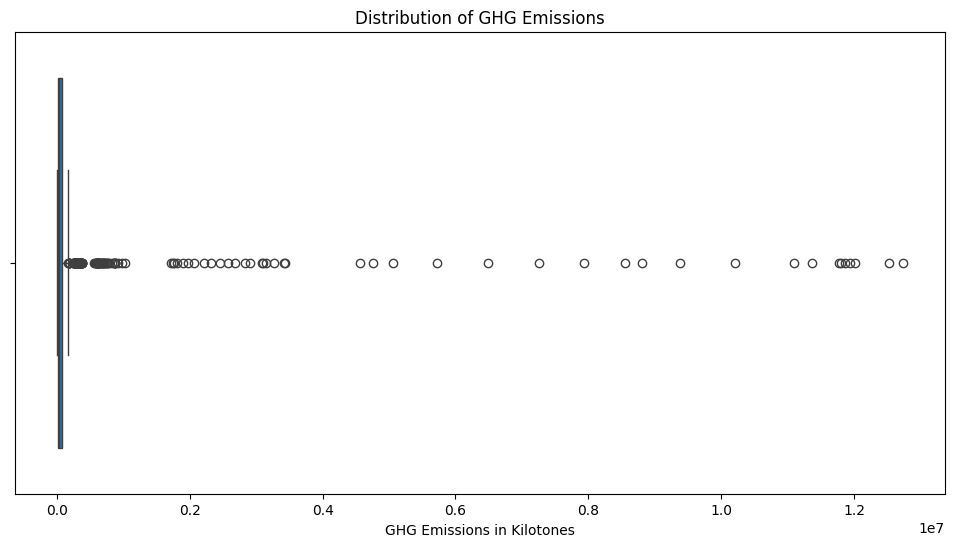

Se muestra la distribución de las emisiones de gases de efecto invernadero en kilotoneladas.
Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.
Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.





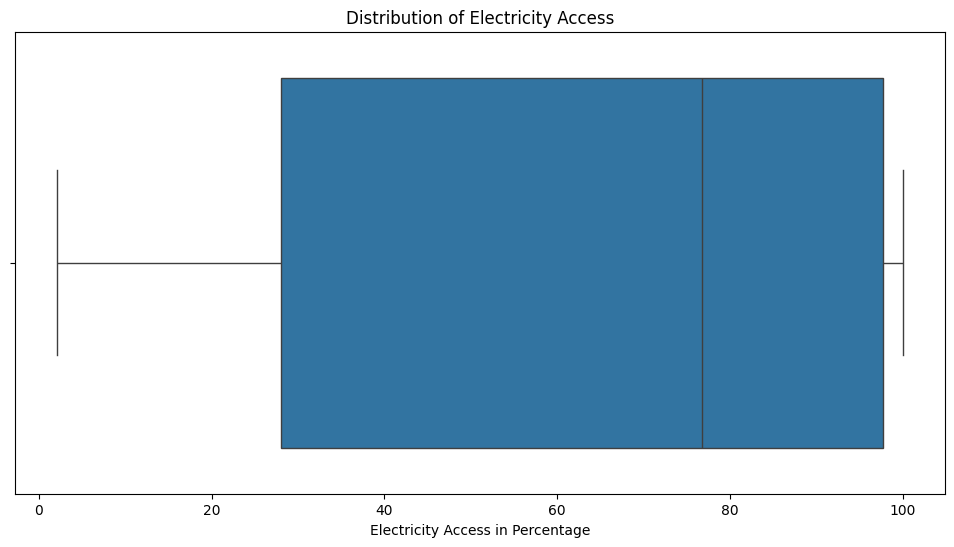

Se muestra la distribución del acceso a la electricidad en porcentaje.
Mínimo: Alrededor del 0% (posiblemente el valor mínimo).
Primer cuartil (Q1): Aproximadamente 75%.
Mediana (Q2): Cerca del 100% (50% de los datos están por debajo y 50% por encima).
Tercer cuartil (Q3): No es distinguible de la mediana, sugiere que los datos tienen acceso muy cercano o igual al 100%.
Sin bigote superior visible: Implica que no hay valores por encima de este rango.





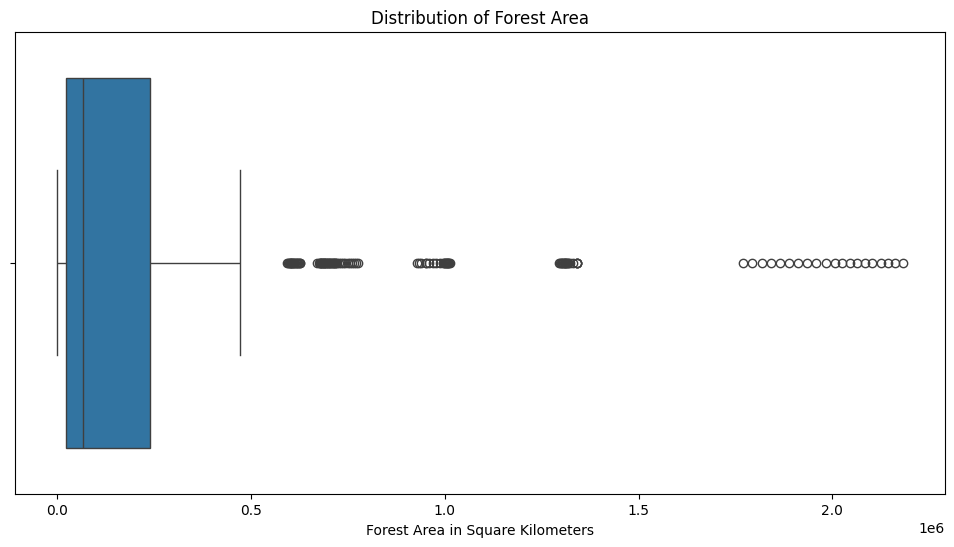

Se muestra la distribución del área forestal en kilómetros cuadrados.
La caja abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), conteniendo el 50% central de los datos.
La mayoría de los datos se concentran hacia el extremo inferior del área forestal.
Hay algunos valores atípicos más allá de los bigotes, indicando áreas con tamaños de bosque excepcionalmente grandes.





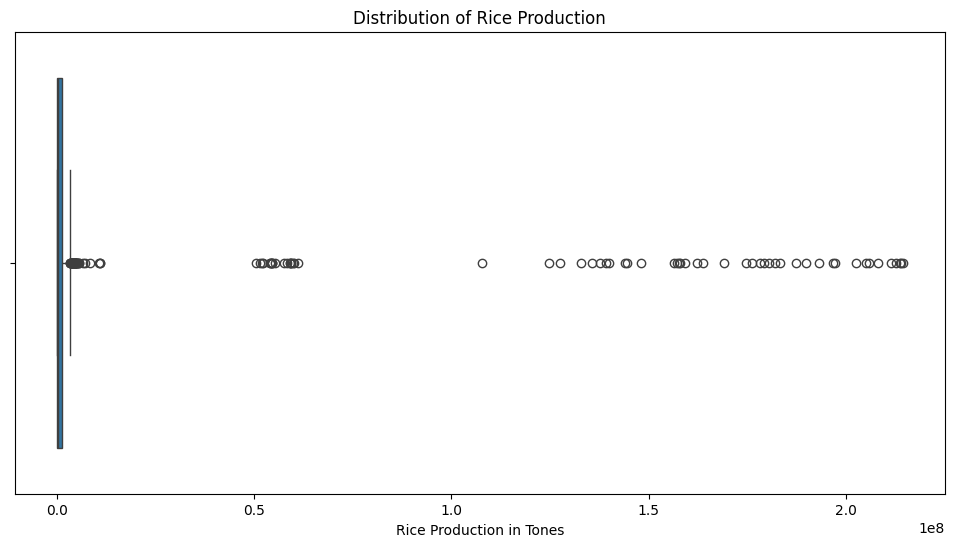

Se muestra la distribución de la producción de arroz en toneladas.
Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.
Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.





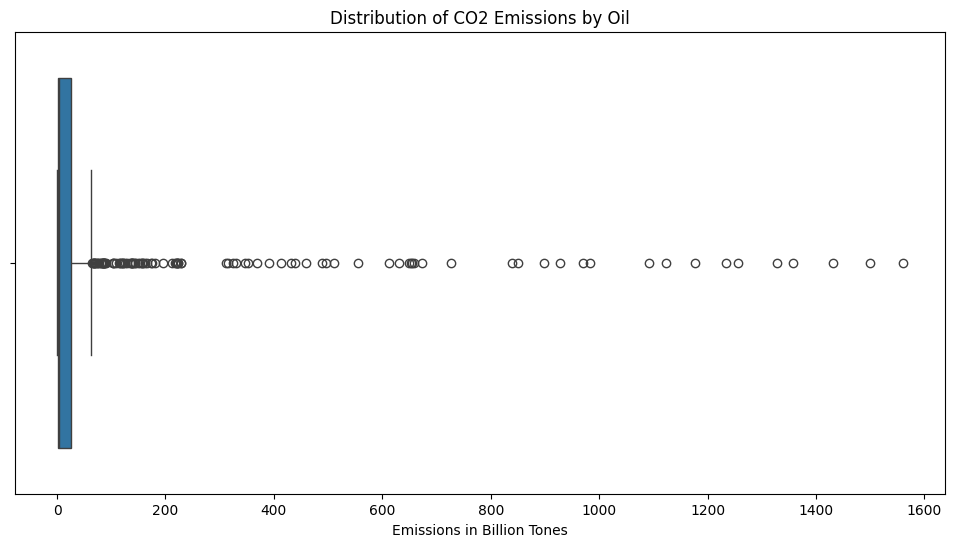

Se muestra la distribución de las emisiones de CO2 provocadas por petróleo en millardos de toneladas.
Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.
Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.





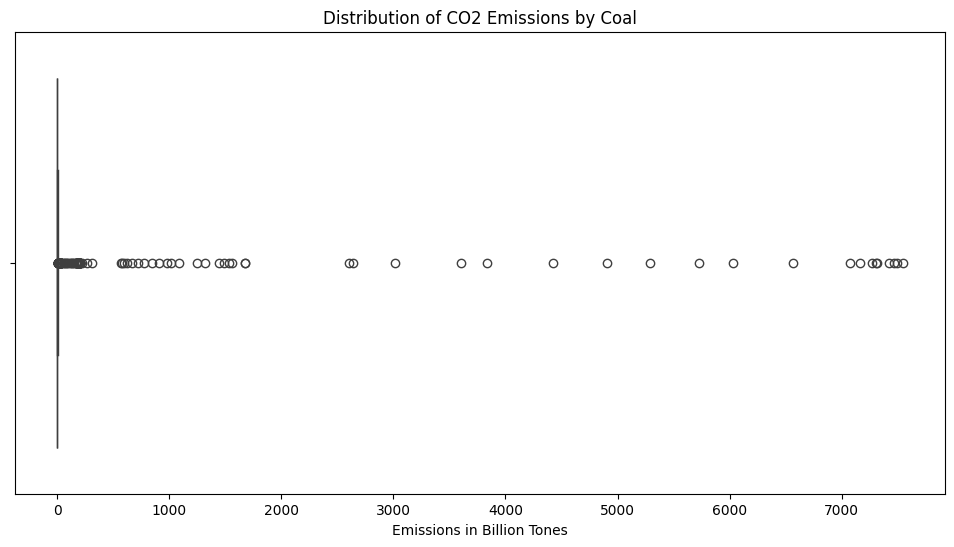

Se muestra la distribución de las emisiones de CO2 provocadas por carbón mineral en millardos de toneladas.
Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.
Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.





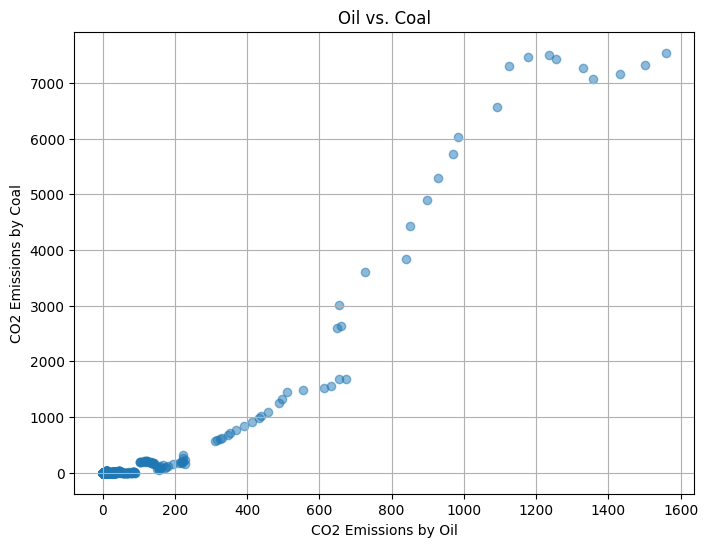

¿Se puede predecir el comportamiento de la variable 'GHG_Emissions_KT' según el comportamiento de las variables 'Oil' y 'Coal'?
La anterior es la pregunta que motiva a preguntar cómo es la relación de dichas variables independientes
Observamos una correlación positiva entre estas dos variables.





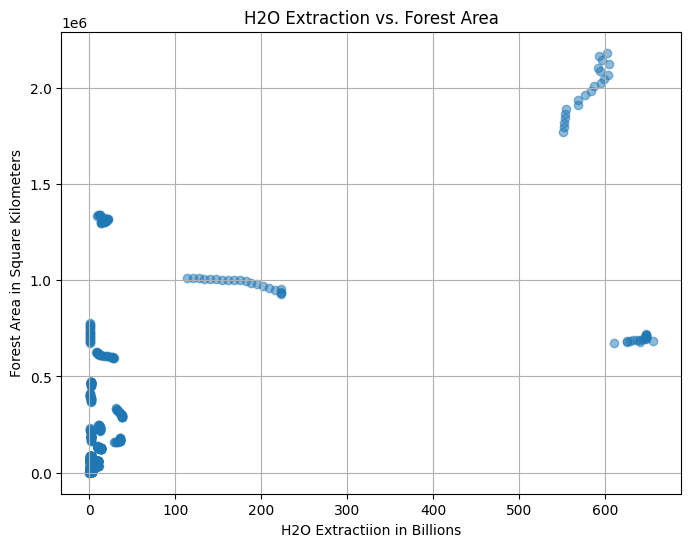

¿Se puede predecir el comportamiento de la variable 'Rice_T' según el comportamiento de las variables 'H2O_Extraction_Billions' y 'Forest_Area_KM2'?
La anterior es la pregunta que motiva a preguntar cómo es la relación de dichas variables independientes
Observamos que no existe una relación lineal entre estas dos variables.





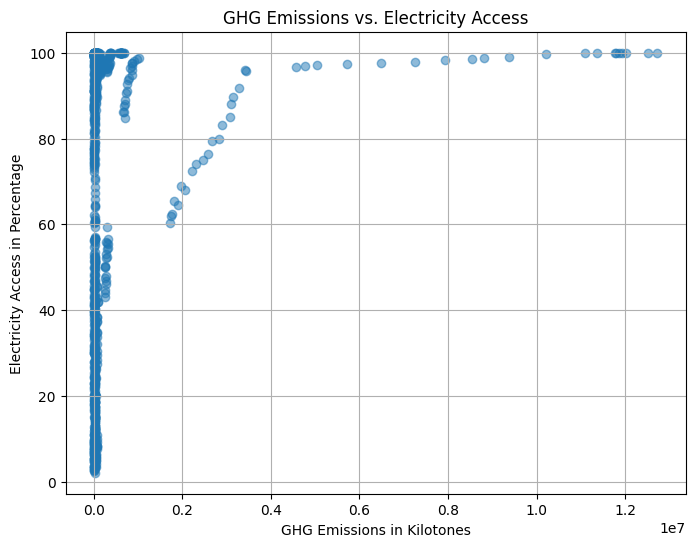

¿Se puede predecir el comportamiento de la variable 'Population_Millions' según el comportamiento de las variables 'GHG_Emissions_KT' y 'Electricity_Access_%'?
La anterior es la pregunta que motiva a preguntar cómo es la relación de dichas variables independientes
Observamos una correlación positiva entre estas dos variables si descartamos los datos cercanos a 0 en el eje X.





In [3]:

#---------------------------CREATE A BOXPLOT PROCEDURE-------------------------------------------------------------

def create_boxplot(data, column, title, xlabel):
    """
    Create a box plot for a specific column of the DataFrame.
    
    :param data: DataFrame containing the data.
    :param column: Name of the column for which the box plot will be created.
    :param title: Title of the plot.
    :param xlabel: Label for the X-axis.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    
#------------------------------------------------------------------------------------------------------------------

#----------------------------------------CREATE A SCATTERPLOT PROCEDURE--------------------------------------------

def scatter_plot(x, y, title, xlabel, ylabel):
    """
    Create a scatter plot.
    
    :param x: Data for the X-axis.
    :param y: Data for the Y-axis.
    :param title: Title of the plot.
    :param xlabel: Label for the X-axis.
    :param ylabel: Label for the Y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

#------------------------------------------------------------------------------------------------------------------

#---------CREATE BOXPLOTS AND SCATTER PLOTS FOR EACH VARIABLE------------------------------------------------------

def main_03():
    # Create box plots for the specified columns
    create_boxplot(my_data, 'Population_Millions', 'Distribution of Population', 'Population in Millions')
    print("Se muestra la distribución de la población en millones.")
    print("Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.")
    print("Este patrón sugiere una distribución altamente sesgada hacia la derecha.")
    print("\n\n")
    
    create_boxplot(my_data, 'H2O_Extraction_Billions', 'Distribution of Water Extraction', 'Water Extraction in Billions')
    print("Se muestra la distribución de la extracción de agua en millardos.")
    print("Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.")
    print("Este patrón sugiere una distribución altamente sesgada hacia la derecha.")
    print("\n\n")

    create_boxplot(my_data, 'GHG_Emissions_KT', 'Distribution of GHG Emissions', 'GHG Emissions in Kilotones')
    print("Se muestra la distribución de las emisiones de gases de efecto invernadero en kilotoneladas.")
    print("Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.")
    print("Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.")
    print("\n\n")

    create_boxplot(my_data, 'Electricity_Access_%', 'Distribution of Electricity Access', 'Electricity Access in Percentage')
    print("Se muestra la distribución del acceso a la electricidad en porcentaje.")
    print("Mínimo: Alrededor del 0% (posiblemente el valor mínimo).")
    print("Primer cuartil (Q1): Aproximadamente 75%.")
    print("Mediana (Q2): Cerca del 100% (50% de los datos están por debajo y 50% por encima).")
    print("Tercer cuartil (Q3): No es distinguible de la mediana, sugiere que los datos tienen acceso muy cercano o igual al 100%.")
    print("Sin bigote superior visible: Implica que no hay valores por encima de este rango.")
    print("\n\n")

    create_boxplot(my_data, 'Forest_Area_KM2', 'Distribution of Forest Area', 'Forest Area in Square Kilometers')
    print("Se muestra la distribución del área forestal en kilómetros cuadrados.")
    print("La caja abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), conteniendo el 50% central de los datos.")
    print("La mayoría de los datos se concentran hacia el extremo inferior del área forestal.")
    print("Hay algunos valores atípicos más allá de los bigotes, indicando áreas con tamaños de bosque excepcionalmente grandes.")
    print("\n\n")

    create_boxplot(my_data, 'Rice_T', 'Distribution of Rice Production', 'Rice Production in Tones')
    print("Se muestra la distribución de la producción de arroz en toneladas.")
    print("Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.")
    print("Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.")
    print("\n\n")

    create_boxplot(my_data, 'Oil', 'Distribution of CO2 Emissions by Oil', 'Emissions in Billion Tones')
    print("Se muestra la distribución de las emisiones de CO2 provocadas por petróleo en millardos de toneladas.")
    print("Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.")
    print("Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.")
    print("\n\n")
    
    create_boxplot(my_data, 'Coal', 'Distribution of CO2 Emissions by Coal', 'Emissions in Billion Tones')
    print("Se muestra la distribución de las emisiones de CO2 provocadas por carbón mineral en millardos de toneladas.")
    print("Los datos se concentran en el extremo inferior, con una dispersión significativa de outliers extendiéndose a la derecha.")
    print("Este patrón sugiere una distribución excesivamente sesgada hacia la derecha.")
    print("\n\n")

    # Create scatter plots to describe relations
    scatter_plot(my_data['Oil'], my_data['Coal'], 'Oil vs. Coal', 'CO2 Emissions by Oil', 'CO2 Emissions by Coal')
    print("¿Se puede predecir el comportamiento de la variable 'GHG_Emissions_KT' según el comportamiento de las variables 'Oil' y 'Coal'?")
    print("La anterior es la pregunta que motiva a preguntar cómo es la relación de dichas variables independientes")
    print("Observamos una correlación positiva entre estas dos variables.")
    print("\n\n")

    scatter_plot(my_data['H2O_Extraction_Billions'], my_data['Forest_Area_KM2'], 'H2O Extraction vs. Forest Area', 'H2O Extractiion in Billions', 'Forest Area in Square Kilometers')
    print("¿Se puede predecir el comportamiento de la variable 'Rice_T' según el comportamiento de las variables 'H2O_Extraction_Billions' y 'Forest_Area_KM2'?")
    print("La anterior es la pregunta que motiva a preguntar cómo es la relación de dichas variables independientes")
    print("Observamos que no existe una relación lineal entre estas dos variables.")    
    print("\n\n")
    
    scatter_plot(my_data['GHG_Emissions_KT'], my_data['Electricity_Access_%'], 'GHG Emissions vs. Electricity Access', 'GHG Emissions in Kilotones', 'Electricity Access in Percentage')
    print("¿Se puede predecir el comportamiento de la variable 'Population_Millions' según el comportamiento de las variables 'GHG_Emissions_KT' y 'Electricity_Access_%'?")
    print("La anterior es la pregunta que motiva a preguntar cómo es la relación de dichas variables independientes")
    print("Observamos una correlación positiva entre estas dos variables si descartamos los datos cercanos a 0 en el eje X.")    
    print("\n\n")

#------------------------------------------------------------------------------------------------------------------

#--------------------------------INVOKE----------------------------------------------------------------------------

main_03()    
    
#------------------------------------------------------------------------------------------------------------------    


## 4.

### Instrucción

Para estudiar si 2 o más variables pueden predecir otra variable utilice la regresión lineal múltiple (https://cienciadedatos.net/documentos/25_regresion_lineal_multiple). Esto implica usar la forma $𝑌 = 𝑎1𝑋2 + 𝑎2𝑋2 + ⋯ + 𝑎n𝑋n + 𝐾$. Por ejemplo, en el lab 3-4, se puede predecir la esperanza de vida con base en la combinación de las variables latitud y altitud (en lugar de tratar ambos casos por aparte). Describa tres preguntas que desea resolver de esta manera y, para cada una, las variables que considera utilizar para generar las predicciones y las variables que se busca predecir.

### Solución

#### Pregunta 1

¿Se puede predecir el comportamiento de la variable 'GHG_Emissions_KT' según el comportamiento de las variables 'Oil' y 'Coal'?

Variables a utilizar para generar las predicciones: 'Oil' y 'Coal'.

Variable que se busca predecir: 'GHG_Emissions_KT'.

#### Pregunta 2

¿Se puede predecir el comportamiento de la variable 'Rice_T' según el comportamiento de las variables 'H2O_Extraction_Billions' y 'Forest_Area_KM2'?

Variables a utilizar para generar las predicciones: 'H2O_Extraction_Billions' y 'Forest_Area_KM2'.

Variable que se busca predecir: 'Rice_T'.

#### Pregunta 3

¿Se puede predecir el comportamiento de la variable 'Population_Millions' según el comportamiento de las variables 'GHG_Emissions_KT' y 'Electricity_Access_%'?

Variables a utilizar para generar las predicciones: 'GHG_Emissions_KT' y 'Electricity_Access_%'.

Variable que se busca predecir: 'Population_Millions'.

---


## 5.

### Instrucción

Para implementar el punto anterior, siga el tutorial "https://www.youtube.com/watch?v=ZmNDRnmYaPc". Implemente las operaciones paso a paso sin utlizar bibliotecas especializadas de Python. Solamente para manipulación de matrices.

## 6.

### Instrucción

Además de obtener los coeficientes de la regresión lineal múltiple, indique también el error de predicción para este modelo y el conjunto de datos estudiado, obtenga el coeficiente de determinación múltiple y el coeficiente ajustado de determinación múltiple. Referencia: "https://www.youtube.com/watch?v=ZmNDRnmYaPc".

---


In [4]:

#---------------------------PASS ALL VALUES ON A DF COLUMN TO A LIST----------------------------------------------

def df_column_to_list(df, column):
    my_list = df[column].tolist()
    return my_list
    
#------------------------------------------------------------------------------------------------------------------

#----------GET SUMMATION OF ALL VALUES ON A LIST------------------------------------------------------------------

def summation_of_one_list_values(my_list):
    my_sum = 0
    for i in my_list:
        my_sum = my_sum + i
    return my_sum

#------------------------------------------------------------------------------------------------------------------

#---------GET SUMMATION OF ALL SQUARING VALUES ON A LIST-----------------------------------------------------------

def summation_of_one_list_squaring_values(my_list):
    my_sum = 0
    for i in my_list:
        my_sum = my_sum + (i*i)
    return my_sum

#------------------------------------------------------------------------------------------------------------------

#------------GET SUMMATION OF MULTIPLIED VALUES ON EACH POSITION OF 2 LISTS----------------------------------------

def summation_of_two_lists_multiplied_values(list_1, list_2):
    my_sum = 0
    length = len(list_1)
    # Iterating the index
    for i in range(length):
        my_sum = my_sum + (list_1[i]*list_2[i])
    return my_sum

#------------------------------------------------------------------------------------------------------------------

#------GET CONSTANTS BASED ON 2 INDEPENDANT VARS AND 1 DEPENDANT---------------------------------------------------

def get_linear_regression_constants(df, i_column_1, i_column_2, d_column):  # i == independant, d == dependant
    list_x1 = df_column_to_list(df, i_column_1)
    list_x2 = df_column_to_list(df, i_column_2)
    list_y = df_column_to_list(df, d_column)
    n = len(list_x1)
    x1_exp1 = summation_of_one_list_values(list_x1)
    x1_exp2 = summation_of_one_list_squaring_values(list_x1)
    x2_exp1 = summation_of_one_list_values(list_x2)
    x2_exp2 = summation_of_one_list_squaring_values(list_x2)
    x1_x2 = summation_of_two_lists_multiplied_values(list_x1, list_x2)
    y = summation_of_one_list_values(list_y)
    y_x1 =  summation_of_two_lists_multiplied_values(list_y, list_x1)
    y_x2 = summation_of_two_lists_multiplied_values(list_y, list_x2)
    matrix_2 = [[n, x1_exp1, x2_exp1], [x1_exp1, x1_exp2, x1_x2],[x2_exp1, x1_x2, x2_exp2]]
    matrix_2 = np.linalg.inv(matrix_2) # Calculating the inverse of the matrix
    matrix_3 = [y, y_x1, y_x2]
    res_dot = np.dot(matrix_2, matrix_3)  # Multiplying 2 matrixes
    const_0 = res_dot[0]
    const_1 = res_dot[1]
    const_2 = res_dot[2]
    return [const_0, const_1, const_2]  # a, b1, b2  or  k, a1, a2
    
#------------------------------------------------------------------------------------------------------------------

#----------------OBTAIN EACH CONST VALUE---------------------------------------------------------------------------

print("La forma de nuestra regresión lineal múltiple es: y = a + b_1*x_1 + b_2*x_2\n\n\n")
# q == pregunta
q1 = get_linear_regression_constants(my_data, 'Oil', 'Coal', 'GHG_Emissions_KT')
print("Los coeficientes para la pregunta 1 son:\ta =", q1[0], "\tb_1 =", q1[1], "\tb_2 =", q1[2])
q2 = get_linear_regression_constants(my_data, 'H2O_Extraction_Billions', 'Forest_Area_KM2', 'Rice_T')
print("Los coeficientes para la pregunta 2 son:\ta =", q2[0], "\tb_1 =", q2[1], "\tb_2 =", q2[2])
q3 = get_linear_regression_constants(my_data, 'GHG_Emissions_KT', 'Electricity_Access_%', 'Population_Millions')
print("Los coeficientes para la pregunta 3 son:\ta =", q3[0], "\tb_1 =", q3[1], "\tb_2 =", q3[2], "\n\n\n")

#------------------------------------------------------------------------------------------------------------------

#-------GET SUMA DE CUADRADOS DEL ERROR OR SCE---------------------------------------------------------------------

def get_sce(df, cf, i_column_1, i_column_2, d_column):  # cf == coefficients
    list_x1 = df_column_to_list(df, i_column_1)
    list_x2 = df_column_to_list(df, i_column_2)
    list_y = df_column_to_list(df, d_column)
    n = len(list_x1)
    sce = 0
    for i in range(n):
        sce = sce + (list_y[i] - (cf[0] + cf[1]*list_x1[i] + cf[2]*list_x2[i])) * (list_y[i] - (cf[0] + cf[1]*list_x1[i] + cf[2]*list_x2[i]))
    return sce
  
#------------------------------------------------------------------------------------------------------------------

#-------GET SUMA DE CUADRADOS DE LA REGRESION OR SCR---------------------------------------------------------------

def get_scr(df, cf, i_column_1, i_column_2, d_column):  # cf == coefficients
    list_x1 = df_column_to_list(df, i_column_1)
    list_x2 = df_column_to_list(df, i_column_2)
    list_y = df_column_to_list(df, d_column)
    n = len(list_x1)
    y_mean = summation_of_one_list_values(list_y) / n
    scr = 0
    for i in range(n):
        scr = scr + ((cf[0] + cf[1]*list_x1[i] + cf[2]*list_x2[i]) - y_mean) * ((cf[0] + cf[1]*list_x1[i] + cf[2]*list_x2[i]) - y_mean)
    return scr
  
#------------------------------------------------------------------------------------------------------------------

#----------OBTAIN AND DISPLAY # Standard Error of the Estimate (SEE)-----------------------------------------------

sce1 = get_sce(my_data, q1, 'Oil', 'Coal', 'GHG_Emissions_KT')
sce2 = get_sce(my_data, q2, 'H2O_Extraction_Billions', 'Forest_Area_KM2', 'Rice_T')
sce3 = get_sce(my_data, q3, 'GHG_Emissions_KT', 'Electricity_Access_%', 'Population_Millions')
n = my_data.shape[0]  # number of observations
k = 2  # number of independant variables

error1 = math.sqrt(sce1 / (n-(k+1)))
error2 = math.sqrt(sce2 / (n-(k+1)))
error3 = math.sqrt(sce3 / (n-(k+1)))

print("El error de predicción para este modelo en la pregunta 1 es:\t", error1)
print("El error de predicción para este modelo en la pregunta 2 es:\t", error2)
print("El error de predicción para este modelo en la pregunta 3 es:\t", error3, "\n\n\n")

#------------------------------------------------------------------------------------------------------------------

#----------OBTAIN AND DISPLAY R^2----------------------------------------------------------------------------------

scr1 = get_scr(my_data, q1, 'Oil', 'Coal', 'GHG_Emissions_KT')
scr2 = get_scr(my_data, q2, 'H2O_Extraction_Billions', 'Forest_Area_KM2', 'Rice_T')
scr3 = get_scr(my_data, q3, 'GHG_Emissions_KT', 'Electricity_Access_%', 'Population_Millions')

stc1 = sce1 + scr1
stc2 = sce2 + scr2
stc3 = sce3 + scr3

r1 = scr1 / stc1
r2 = scr2 / stc2
r3 = scr3 / stc3

print("El coeficiente de determinación múltiple o R^2 en la pregunta 1 es:\t", r1)
print("El coeficiente de determinación múltiple o R^2 en la pregunta 2 es:\t", r2)
print("El coeficiente de determinación múltiple o R^2 en la pregunta 3 es:\t", r3, "\n\n\n")

#------------------------------------------------------------------------------------------------------------------

#----------OBTAIN AND DISPLAY IMPROVED R^2-------------------------------------------------------------------------

imp_r1 = 1 - (1-r1) * ( (n-1)/(n-k-1) )
imp_r2 = 1 - (1-r2) * ( (n-1)/(n-k-1) )
imp_r3 = 1 - (1-r3) * ( (n-1)/(n-k-1) )

print("El coeficiente ajustado de determinación múltiple en la pregunta 1 es:\t", imp_r1)
print("El coeficiente ajustado de determinación múltiple en la pregunta 2 es:\t", imp_r2)
print("El coeficiente ajustado de determinación múltiple en la pregunta 3 es:\t", imp_r3, "\n\n\n")

#------------------------------------------------------------------------------------------------------------------

#----------PRINT PERSONAL CONCLUSSION------------------------------------------------------------------------------

print("Se concluye que para las tres preguntas planteades la respuesta es sí.")
print("Ya que para todas el coeficiente ajustado de determinación múltiple es mayor que 0.7,")
print("si es mayor que 0.7 se considera que hay una relación muy fuerte entre las variables independientes y la dependiente.")
print("Además, los errores de predicción dan valores que en base al contexto de cada pregunta no son excesivamente grandes.\n\n\n")

#------------------------------------------------------------------------------------------------------------------


La forma de nuestra regresión lineal múltiple es: y = a + b_1*x_1 + b_2*x_2



Los coeficientes para la pregunta 1 son:	a = 13544.323612255877 	b_1 = 3056.3113668833344 	b_2 = 1055.1993596961688
Los coeficientes para la pregunta 2 son:	a = -2696241.420421825 	b_1 = 254704.11638656195 	b_2 = 12.99176453559583
Los coeficientes para la pregunta 3 son:	a = 6.030489137628127 	b_1 = 7.178218909012203e-05 	b_2 = 0.07125342074352535 



El error de predicción para este modelo en la pregunta 1 es:	 54182.63028676336
El error de predicción para este modelo en la pregunta 2 es:	 7741285.12724673
El error de predicción para este modelo en la pregunta 3 es:	 37.56719885013463 



El coeficiente de determinación múltiple o R^2 en la pregunta 1 es:	 0.9988670376981704
El coeficiente de determinación múltiple o R^2 en la pregunta 2 es:	 0.962411806904616
El coeficiente de determinación múltiple o R^2 en la pregunta 3 es:	 0.9052176857872152 



El coeficiente ajustado de determinación múltiple en la p

# 7.

### Instrucción

Invente 3 datos nuevos para intentar, con valores para las variables X usadas en la predicción pero no para la variable Y. Por ejemplo, para el lab 3-4, se puede crear los datos de latitud $9.6516711629073$ y altitud de $0$ msnv, que corresponden a Puerto Viejo de Limón. La idea es obtener una predicción de la variable Y. En el ejemplo, la idea sería predecir la esperanza de vida a partir de la altitud y latitud. Obtenga el valor de la variable pronosticado por la combinación lineal para los 3 datos. Esto podría dar una predicción valiosa o no, lo cual depende de la capacidad predictiva del modelo. Explique y justifique si le parecen predicción valiosas o no. ¿Cómo podría mejorarse?

---


In [5]:
def linear_regression_prediction(df, independent_vars, dependent_var, new_data):
    # Filtrar las columnas necesarias
    X = df[independent_vars]
    y = df[dependent_var]

    # Crear el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Coeficientes del modelo
    intercept = model.intercept_
    coef = model.coef_

    #print(f"Intercept for {dependent_var}:", intercept)
    #print(f"Coeficientes for {dependent_var}:", coef)

    # Predicciones
    predictions = model.predict(new_data)
    #print(f"Predicciones para nuevos datos ({dependent_var}):", predictions)

    # Mostrar los resultados de predicción con los datos inventados
    resultados = new_data.copy()
    resultados[f'{dependent_var}_Pred'] = predictions
    print(resultados)
    print("\n")
    return resultados

# Pregunta 1: Predecir 'GHG_Emissions_KT' según 'Oil' y 'Coal'
new_data_ghg = pd.DataFrame({
    'Oil': [5.0, 20.0, 50.0],
    'Coal': [0.5, 5.0, 10.0]
})
result_ghg = linear_regression_prediction(my_data, ['Oil', 'Coal'], 'GHG_Emissions_KT', new_data_ghg)

# Pregunta 2: Predecir 'Rice_T' según 'H2O_Extraction_Billions' y 'Forest_Area_KM2'
new_data_rice = pd.DataFrame({
    'H2O_Extraction_Billions': [50.0, 100.0, 200.0],
    'Forest_Area_KM2': [50.0, 300.0, 450.0]
})
result_rice = linear_regression_prediction(my_data, ['H2O_Extraction_Billions', 'Forest_Area_KM2'], 'Rice_T', new_data_rice)

# Pregunta 3: Predecir 'Population_Millions' según 'GHG_Emissions_KT' y 'Electricity_Access_%'
new_data_population = pd.DataFrame({
    'GHG_Emissions_KT': [100.0, 200.0, 300.0],
    'Electricity_Access_%': [50.0, 75.0, 90.0]
})
result_population = linear_regression_prediction(my_data, ['GHG_Emissions_KT', 'Electricity_Access_%'], 'Population_Millions', new_data_population)


    Oil  Coal  GHG_Emissions_KT_Pred
0   5.0   0.5           29353.480127
1  20.0   5.0           79946.547748
2  50.0  10.0          176911.885553


   H2O_Extraction_Billions  Forest_Area_KM2   Rice_T_Pred
0                     50.0             50.0  1.003961e+07
1                    100.0            300.0  2.277807e+07
2                    200.0            450.0  4.825043e+07


   GHG_Emissions_KT  Electricity_Access_%  Population_Millions_Pred
0             100.0                  50.0                  9.600338
1             200.0                  75.0                 11.388852
2             300.0                  90.0                 12.464832





### Predicción 1: GHG_Emissions_KT según Oil y Coal
```plaintext
    Oil  Coal  GHG_Emissions_KT_Pred
0   5.0   0.5           29353.480127
1  20.0   5.0           79946.547748
2  50.0  10.0          176911.885553
```
En este caso, las predicciones de emisiones de gases de efecto invernadero (GHG_Emissions_KT) se incrementan notablemente a medida que aumentan los valores de Oil y Coal. Esto sugiere que estas variables tienen un impacto significativo en las emisiones, lo cual es coherente con la lógica de que combustibles fósiles como el petróleo (Oil) y el carbón (Coal) contribuyen considerablemente a las emisiones de gases de efecto invernadero.

### Predicción 2: Rice_T según H2O_Extraction_Billions y Forest_Area_KM2
```plaintext
  H2O_Extraction_Billions  Forest_Area_KM2   Rice_T_Pred
0                     50.0             50.0  1.003961e+07
1                    100.0            300.0  2.277807e+07
2                    200.0            450.0  4.825043e+07
```
En este caso, las predicciones de la producción de arroz (Rice_T) también muestran un aumento conforme aumentan los valores de H2O_Extraction_Billions y Forest_Area_KM2. Esto podría indicar que una mayor extracción de agua y una mayor área forestal tienen una relación positiva con la producción de arroz. 

### Predicción 3: Population_Millions según GHG_Emissions_KT y Electricity_Access_%
```plaintext
   GHG_Emissions_KT  Electricity_Access_%  Population_Millions_Pred
0             100.0                  50.0                  9.600338
1             200.0                  75.0                 11.388852
2             300.0                  90.0                 12.464832
```
En este caso, las predicciones de la población (Population_Millions) muestran un aumento conforme aumentan los valores de GHG_Emissions_KT y Electricity_Access_%. Esto sugiere que un mayor acceso a la electricidad y mayores emisiones de gases de efecto invernadero están asociados con un aumento en la población. 

### Evaluación de las predicciones
Las predicciones proporcionadas son valiosas en el sentido de que muestran las tendencias esperadas según las variables independientes proporcionadas. Sin embargo, la calidad de las predicciones depende de la calidad de los datos, la representatividad del modelo y la adecuación de la regresión lineal para capturar relaciones complejas entre las variables. Para mejorar las predicciones, podrían considerarse modelos más sofisticados que capturen mejor la no linealidad y las interacciones entre las variables, así como la inclusión de más variables relevantes que podrían afectar la variable dependiente.

# 8.

### Instrucción

Pruebe otra combinación de variables para predecir la variable de interés. Si usó solamente 2 variables, pruebe añadir otra variable o si usó más de 2 variables, intente eliminar la variable que considera que contribuye menos en el modelo. Obtenga los coeficientes para este nuevo modelo, así como el error de predicción y el coeficiente ajustado de determinación múltiple. Compare entre este modelo y el anterior y explique cuál de los dos modelos es mejor y de qué forma. Busque en internet cómo saber si un modelo es mejor que otro para fundamentar su respuesta.

---


In [6]:
# Función para entrenar un modelo de regresión lineal y obtener coeficientes
def train_linear_regression(df, independent_vars, dependent_var):
    try:
        X = df[independent_vars]
        y = df[dependent_var]
        
        # Verificar que X y y tengan la misma longitud
        if len(X) != len(y):
            raise ValueError("Las dimensiones de X y y no coinciden.")
        
        model = LinearRegression()
        model.fit(X, y)
        intercept = model.intercept_
        coef = model.coef_
        return model, intercept, coef
    
    except KeyError as e:
        raise KeyError(f"Una o más columnas especificadas no existen en el DataFrame: {e}")

    except ValueError as ve:
        raise ValueError(f"Error en las dimensiones de los datos: {ve}")

# Función para predecir con un modelo entrenado y calcular métricas
def predict_and_evaluate(model, X, y):
    predictions = model.predict(X)
    r2 = model.score(X, y)
    mse = mean_squared_error(y, predictions)
    return predictions, r2, mse

# Función para calcular R² ajustado
def calculate_adjusted_r2(r2, n, p):
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

# Función para realizar una predicción específica y evaluar el modelo
def perform_prediction(df, independent_vars, dependent_var):
    try:
        # Entrenar el modelo
        model, intercept, coef = train_linear_regression(df, independent_vars, dependent_var)

        # Predecir y evaluar el modelo
        X = df[independent_vars]
        y = df[dependent_var]
        predictions, r2, mse = predict_and_evaluate(model, X, y)

        # Calcular R² ajustado del modelo
        n = len(y)
        p = len(independent_vars)
        adjusted_r2 = calculate_adjusted_r2(r2, n, p)
        
        # Mostrar coeficientes del modelo
        print("\nCoeficientes del modelo:", coef)
        print("R² ajustado del modelo:", adjusted_r2)
        print("Error de predicción (MSE) del modelo:", mse)

        return model, adjusted_r2, mse

    except Exception as e:
        print(f"Se produjo un error: {e}")

# Ejemplo de uso para las tres predicciones
def main():
    try:
        print("### Predicción 1: GHG_Emissions_KT según Oil y Coal ###")
        independent_vars_pred1 = ['Oil', 'Coal']
        dependent_var_pred1 = 'GHG_Emissions_KT'
        model_pred1, r2_pred1, mse_pred1 = perform_prediction(my_data, independent_vars_pred1, dependent_var_pred1)

        print("\n### Predicción 2: Rice_T según H2O_Extraction_Billions y Forest_Area_KM2 ###")
        independent_vars_pred2 = ['H2O_Extraction_Billions', 'Forest_Area_KM2']
        dependent_var_pred2 = 'Rice_T'
        model_pred2, r2_pred2, mse_pred2 = perform_prediction(my_data, independent_vars_pred2, dependent_var_pred2)

        print("\n### Predicción 3: Population_Millions según GHG_Emissions_KT y Electricity_Access_% ###")
        independent_vars_pred3 = ['GHG_Emissions_KT', 'Electricity_Access_%']
        dependent_var_pred3 = 'Population_Millions'
        model_pred3, r2_pred3, mse_pred3 = perform_prediction(my_data, independent_vars_pred3, dependent_var_pred3)

        print("\n### Predicción 4: GHG_Emissions_KT según Oil, Coal y Electricity_Access_% ###")
        independent_vars_pred4 = ['Oil', 'Coal', 'Electricity_Access_%']
        dependent_var_pred4 = 'GHG_Emissions_KT'
        model_pred4, r2_pred4, mse_pred4 = perform_prediction(my_data, independent_vars_pred4, dependent_var_pred4)

        print("\n### Predicción 5: Rice_T según H2O_Extraction_Billions, Forest_Area_KM2 y Electricity_Access_% ###")
        independent_vars_pred5 = ['H2O_Extraction_Billions', 'Forest_Area_KM2', 'Electricity_Access_%']
        dependent_var_pred5 = 'Rice_T'
        model_pred5, r2_pred5, mse_pred5 = perform_prediction(my_data, independent_vars_pred5, dependent_var_pred5)

        print("\n### Predicción 6: Population_Millions según GHG_Emissions_KT, Electricity_Access_% y Forest_Area_KM2 ###")
        independent_vars_pred6 = ['GHG_Emissions_KT', 'Electricity_Access_%', 'Forest_Area_KM2']
        dependent_var_pred6 = 'Population_Millions'
        model_pred6, r2_pred6, mse_pred6 = perform_prediction(my_data, independent_vars_pred6, dependent_var_pred6)

        print("\n\n\n")
        # Determinar el mejor modelo según R² ajustado
        best_model = max([(r2_pred1, "Modelo 1"),  (r2_pred4, "Modelo 4")])
        print(f"\nEl mejor modelo entre 1 y 4 según R² ajustado es: {best_model[1]}")
        best_model = max([(r2_pred2, "Modelo 2"),  (r2_pred5, "Modelo 5")])
        print(f"\nEl mejor modelo entre 2 y 5 según R² ajustado es: {best_model[1]}")
        best_model = max([(r2_pred3, "Modelo 3"),  (r2_pred6, "Modelo 6")])
        print(f"\nEl mejor modelo entre 3 y 6 según R² ajustado es: {best_model[1]}")
        print("\n\n\n")
    except Exception as e:
        print(f"Se produjo un error: {e}")

if __name__ == "__main__":
    main()


### Predicción 1: GHG_Emissions_KT según Oil y Coal ###

Coeficientes del modelo: [3056.31136688 1055.1993597 ]
R² ajustado del modelo: 0.9988639797702303
Error de predicción (MSE) del modelo: 2923919693.2405043

### Predicción 2: Rice_T según H2O_Extraction_Billions y Forest_Area_KM2 ###

Coeficientes del modelo: [2.54704116e+05 1.29917645e+01]
R² ajustado del modelo: 0.962310354291673
Error de predicción (MSE) del modelo: 59685852294632.54

### Predicción 3: Population_Millions según GHG_Emissions_KT y Electricity_Access_% ###

Coeficientes del modelo: [7.17821891e-05 7.12534207e-02]
R² ajustado del modelo: 0.9049618630767892
Error de predicción (MSE) del modelo: 1405.6037261010179

### Predicción 4: GHG_Emissions_KT según Oil, Coal y Electricity_Access_% ###

Coeficientes del modelo: [3100.13829507 1048.73084505 -256.04216097]
R² ajustado del modelo: 0.9988909208480596
Error de predicción (MSE) del modelo: 2850725684.073086

### Predicción 5: Rice_T según H2O_Extraction_Billions, Fo

### Para comparar dos modelos de regresión lineal y determinar cuál es mejor, se suelen considerar varios criterios y métricas.

Entre los mas comunes:

R² Ajustado (Adjusted R²): Esta métrica penaliza la inclusión de variables irrelevantes en el modelo, ajustando el R² por el número de variables independientes utilizadas. Cuanto más alto sea el R² ajustado, mejor será el modelo, ya que indica que una mayor proporción de la variabilidad de la variable dependiente está siendo explicada por las variables independientes.

Error de Predicción (MSE o RMSE): El Error Cuadrático Medio (MSE) o su raíz cuadrada (RMSE) son métricas que indican qué tan cerca están las predicciones del modelo de los valores observados. Un modelo con un MSE más bajo se considera mejor en términos de precisión de predicción.

Basándonos en las métricas de evaluación (R² ajustado y MSE), los nuevos modelos sobre las predicciones parecen ser mejores que los modelos originales. El R² ajustado ligeramente superior indica una mejor capacidad del nuevo modelo para explicar las variaciones. Además, el menor MSE indica que las predicciones del nuevo modelo son más precisas en comparación con las del modelo original.


# 9.

### Instrucción

A partir del conjunto de datos, separe la población en varios grupos que desee comparar, similar a lo realizado en el laboratorio 4, para las diferentes latitudes o altitudes. Para cada pregunta de investigación (por lo menos 3 preguntas), plantee por lo menos 2 ó 3 grupos distintos, dependiendo de lo que tenga mayor sentido.

---


In [7]:

def categorize_population(df, population_column='Population_Millions', labels=['Small', 'Medium', 'Large']):

    quantiles = df[population_column].quantile([0.33, 0.66]).values

    # Función para asignar etiquetas según el tamaño de la población
    def categorize_population_inner(population):
        if population <= quantiles[0]:
            return labels[0]
        elif population <= quantiles[1]:
            return labels[1]
        else:
            return labels[2]

    # Aplicar la función para categorizar
    df['Size_Population'] = df[population_column].apply(categorize_population_inner)

    return df

if __name__ == "__main__":

    # Convertir los datos en un DataFrame de pandas
    df = pd.DataFrame(my_data)

    # Aplicar la función para categorizar
    df_categorized = categorize_population(df, population_column='Population_Millions', labels=['Small', 'Medium', 'Large'])

    # Mostrar el DataFrame con la nueva categoría
    print(df_categorized[['name', 'Year', 'Population_Millions', 'Size_Population']])
    

          name  Year  Population_Millions Size_Population
0    Indonesia  2000            89.914698           Large
1      Senegal  2000             3.912769          Medium
2    Australia  2000            16.028911           Large
3      Albania  2000             1.289391           Small
4      Uruguay  2000             3.029768           Small
..         ...   ...                  ...             ...
739  Indonesia  2019           150.925974           Large
740   Portugal  2019             6.764658          Medium
741     Angola  2019            21.410634           Large
742   Paraguay  2019             4.040715          Medium
743    Albania  2019             1.747593           Small

[744 rows x 4 columns]


# 10.

### Instrucción

Utilice diagramas de cajas para estudiar la distribución de cada uno de los grupos de análisis. Al igual que en el lab 4, grafique las distribuciones de cada grupo, uno a la par del otro.

---


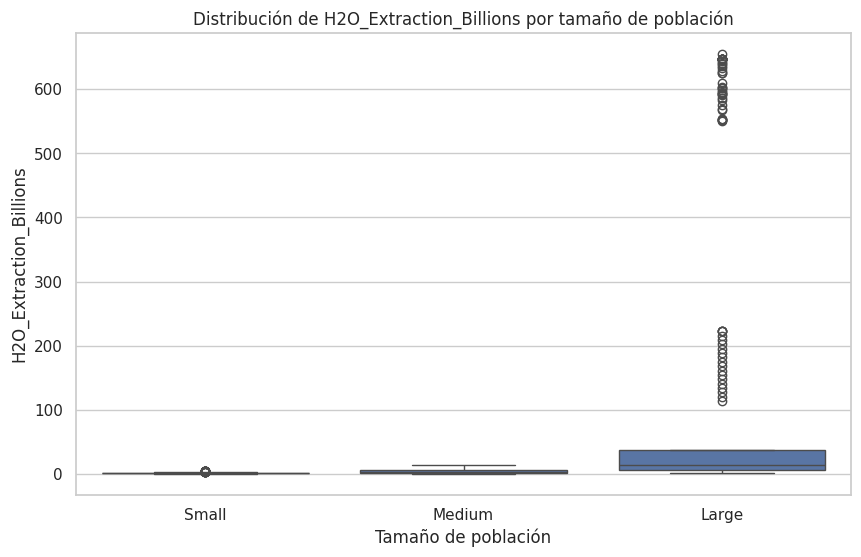

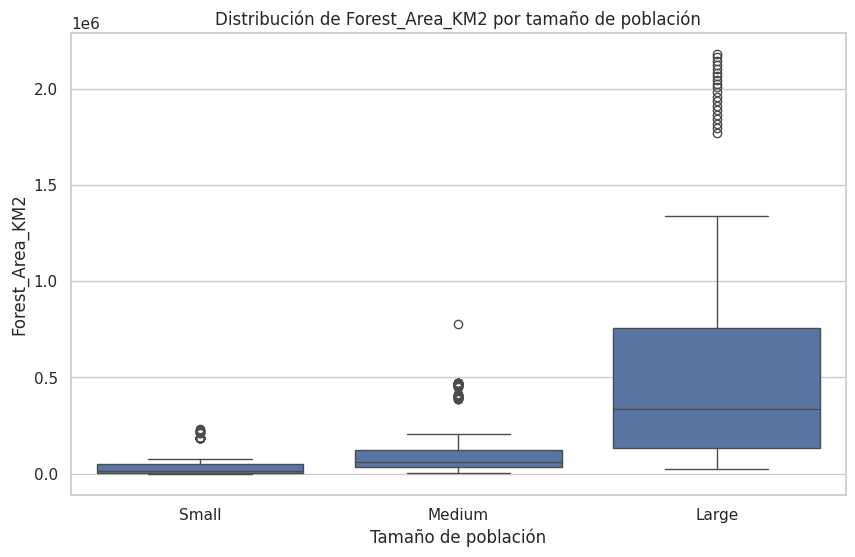

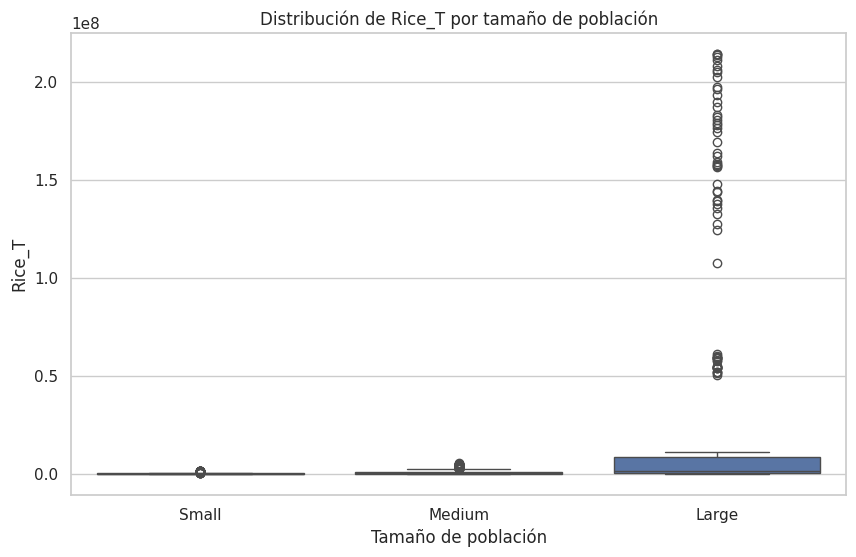

In [8]:

def plot_boxplots(df, variable, size_variable):
    # Configuración de estilo de seaborn
    sns.set(style="whitegrid")
    
    # Definir los nombres de los grupos y el orden para el boxplot
    order = ['Small', 'Medium', 'Large']
    
    # Crear el gráfico de cajas (boxplot)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=size_variable, y=variable, data=df, order=order)
    
    # Añadir detalles al gráfico
    plt.title(f'Distribución de {variable} por tamaño de población')
    plt.xlabel('Tamaño de población')
    plt.ylabel(f'{variable}')
    
    # Mostrar el gráfico
    plt.show()

# Responder la pregunta 1: H2O_Extraction_Billions según Size_Population
plot_boxplots(df, 'H2O_Extraction_Billions', 'Size_Population')

# Responder la pregunta 2: Forest_Area_KM2 según Size_Population
plot_boxplots(df, 'Forest_Area_KM2', 'Size_Population')

# Responder la pregunta 3: Rice_T según Size_Population
plot_boxplots(df, 'Rice_T', 'Size_Population')


# 11.

### Instrucción

Al igual que en el lab 4, realice análisis de varianza para comparar las medias de los grupos y poder contestar a las preguntas investigadas. ¿Provienen los grupos de la misma distribución o de distribuciones distintas? Concluya respondiendo a estas preguntas.

---


Variable: H2O_Extraction_Billions
F-statistic: 72.67547282470562
P-value: 1.5126192311830341e-29
El p-valor es menor que 0.05, por lo tanto, hay diferencias significativas entre los grupos.


                          sum_sq     df          F        PR(>F)
C(Size_Population)  2.340698e+06    2.0  72.675473  1.512619e-29
Residual            1.193289e+07  741.0        NaN           NaN

Tukey HSD

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
 Large Medium -117.0028    0.0 -143.7151 -90.2904   True
 Large  Small -119.7483    0.0 -146.4331 -93.0636   True
Medium  Small   -2.7456 0.9688  -29.6443  24.1531  False
--------------------------------------------------------


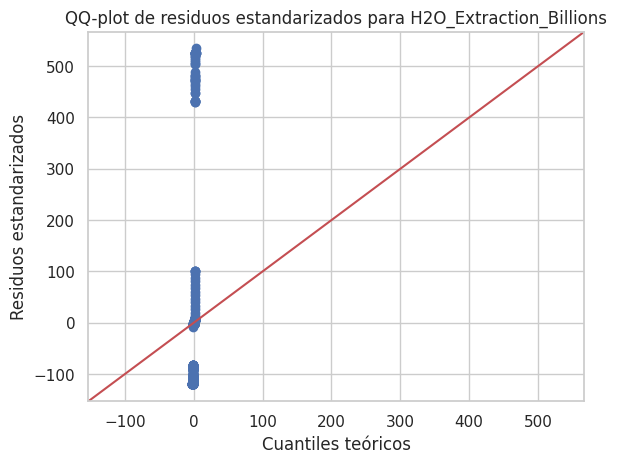

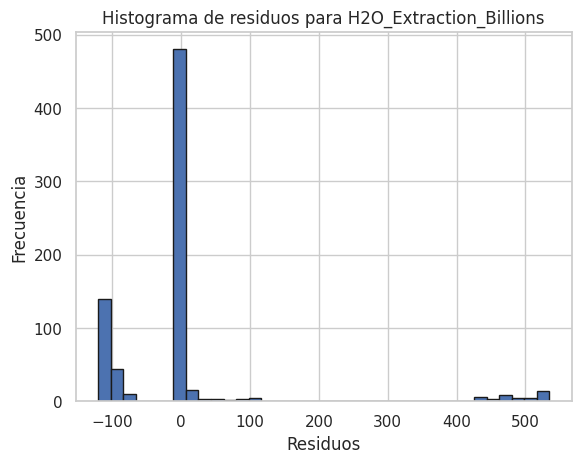

Prueba de Shapiro-Wilk

W: 0.541186293099396, p-value: 4.070036306675572e-40
El p-valor es menor que 0.05, por lo tanto, los residuos no siguen una distribución normal.


Prueba de Levene

W: 68.59170618541785, p-value: 4.670017126290252e-28
El p-valor es menor que 0.05, por lo tanto, las varianzas no son homogéneas.


Variable: Forest_Area_KM2
F-statistic: 189.56911874120544
P-value: 3.2546915285181496e-67
El p-valor es menor que 0.05, por lo tanto, hay diferencias significativas entre los grupos.


                          sum_sq     df           F        PR(>F)
C(Size_Population)  4.349481e+13    2.0  189.569119  3.254692e-67
Residual            8.500766e+13  741.0         NaN           NaN

Tukey HSD

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
 Large Medium -467323.0418    0.0 -538619.5924 -396026.4912   True
 Large  Small -5

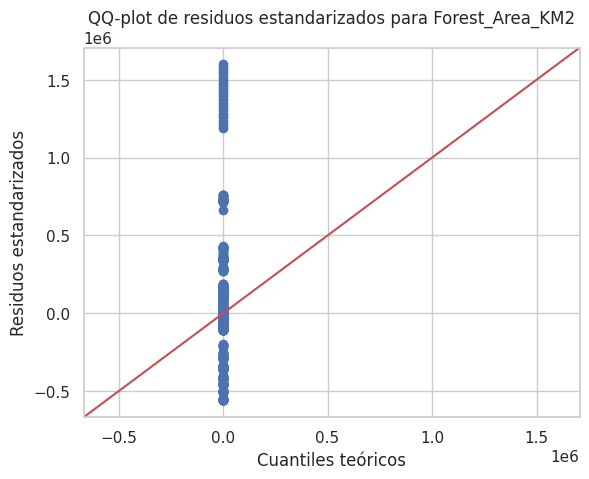

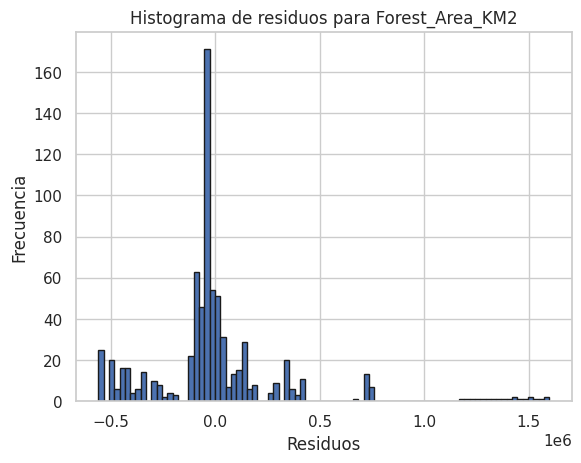

Prueba de Shapiro-Wilk

W: 0.785955660132496, p-value: 4.1280380263415236e-30
El p-valor es menor que 0.05, por lo tanto, los residuos no siguen una distribución normal.


Prueba de Levene

W: 166.29037442503798, p-value: 2.204875426027511e-60
El p-valor es menor que 0.05, por lo tanto, las varianzas no son homogéneas.


Variable: Rice_T
F-statistic: 63.141474556506516
P-value: 4.776025325158739e-26
El p-valor es menor que 0.05, por lo tanto, hay diferencias significativas entre los grupos.


                          sum_sq     df          F        PR(>F)
C(Size_Population)  1.720191e+17    2.0  63.141475  4.776025e-26
Residual            1.009370e+18  741.0        NaN           NaN

Tukey HSD

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
group1 group2    meandiff    p-adj      lower          upper      reject
------------------------------------------------------------------------
 Large Medium -31770855.9367    0.0 -39539847.3085 -24001864.5649   True
 La

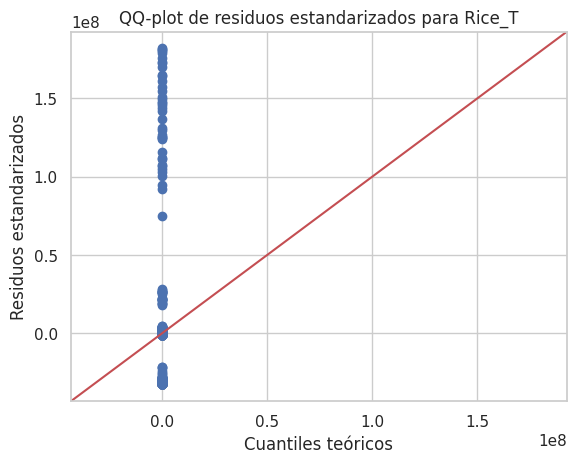

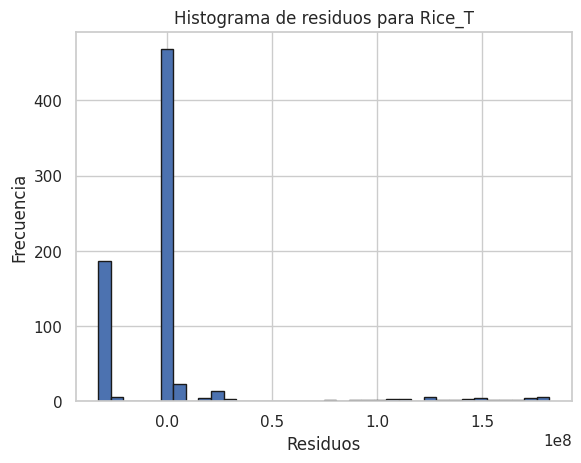

Prueba de Shapiro-Wilk

W: 0.5473981126289422, p-value: 6.333884017284744e-40
El p-valor es menor que 0.05, por lo tanto, los residuos no siguen una distribución normal.


Prueba de Levene

W: 62.605993446597026, p-value: 7.548904132546337e-26
El p-valor es menor que 0.05, por lo tanto, las varianzas no son homogéneas.




In [9]:

# Función para realizar ANOVA y mostrar resultados
def anova_and_results(df, variable):
    groups = []
    for group_name, group_data in df.groupby('Size_Population')[variable]:
        groups.append(group_data)

    # Realizar ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Mostrar resultados
    print(f"Variable: {variable}")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("El p-valor es menor que 0.05, por lo tanto, hay diferencias significativas entre los grupos.")
    else:
        print("El p-valor es mayor que 0.05, por lo tanto, no hay diferencias significativas entre los grupos.")
    print("\n")
    
    # Ajustar el modelo ANOVA y realizar la prueba de Tukey
    model = ols(f'{variable} ~ C(Size_Population)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    
    tukey = pairwise_tukeyhsd(endog=df[variable], groups=df['Size_Population'], alpha=0.05)
    print("\nTukey HSD\n")
    print(tukey.summary())

    # QQ-plot de los residuos estandarizados
    sm.qqplot(model.resid, line='45')
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Residuos estandarizados")
    plt.title(f'QQ-plot de residuos estandarizados para {variable}')
    plt.show()

    # Histograma de los residuos
    plt.hist(model.resid, bins='auto', histtype='bar', ec='k') 
    plt.xlabel("Residuos")
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de residuos para {variable}')
    plt.show()

    # Prueba de Shapiro-Wilk para normalidad de los residuos
    w, pvalue_shapiro = stats.shapiro(model.resid)
    print("Prueba de Shapiro-Wilk\n")
    print(f"W: {w}, p-value: {pvalue_shapiro}")
    if pvalue_shapiro < 0.05:
        print("El p-valor es menor que 0.05, por lo tanto, los residuos no siguen una distribución normal.")
    else:
        print("El p-valor es mayor que 0.05, por lo tanto, los residuos siguen una distribución normal.")
    print("\n")

    # Prueba de Levene para homogeneidad de varianzas
    print("Prueba de Levene\n")
    w_levene, pvalue_levene = stats.levene(*groups)
    print(f"W: {w_levene}, p-value: {pvalue_levene}")
    if pvalue_levene < 0.05:
        print("El p-valor es menor que 0.05, por lo tanto, las varianzas no son homogéneas.")
    else:
        print("El p-valor es mayor que 0.05, por lo tanto, las varianzas son homogéneas.")
    print("\n")

# Aplicar la función para cada variable de interés
variables_of_interest = ['H2O_Extraction_Billions', 'Forest_Area_KM2', 'Rice_T']
for var in variables_of_interest:
    anova_and_results(df, var)


# ANOVA

## 1. ¿Cómo se comporta la variable 'H2O_Extraction_Billions' según su categoría en 'Population_Size: Small, Medium, Large'?

### Resultados del ANOVA:

* F-statistic: 72.675
* P-value: 1.51e-29
* Conclusión: El p-valor es menor que 0.05, indicando que hay diferencias significativas entre los grupos.

### Resultados de Tukey:

* Large vs Medium: Diferencia significativa.
* Large vs Small: Diferencia significativa.
* Medium vs Small: No hay diferencia significativa.
  
### Pruebas adicionales:

* Shapiro-Wilk: Los residuos no siguen una distribución normal.
* Levene: Las varianzas no son homogéneas.
  
## 2. ¿Cómo se comporta la variable 'Forest_Area_KM2' según su categoría en 'Population_Size: Small, Medium, Large'?

### Resultados del ANOVA:

* F-statistic: 189.569
* P-value: 3.25e-67
* Conclusión: El p-valor es menor que 0.05, indicando que hay diferencias significativas entre los grupos.
  
### Resultados de Tukey:

* Large vs Medium: Diferencia significativa.
* Large vs Small: Diferencia significativa.
* Medium vs Small: Diferencia significativa.
  
### Pruebas adicionales:

* Shapiro-Wilk: Los residuos no siguen una distribución normal.
* Levene: Las varianzas no son homogéneas.

## 3. ¿Cómo se comporta la variable 'Rice_T' según su categoría en 'Population_Size: Small, Medium, Large'?

### Resultados del ANOVA:

* F-statistic: 63.141
* P-value: 4.78e-26
* Conclusión: El p-valor es menor que 0.05, indicando que hay diferencias significativas entre los grupos.
  
### Resultados de Tukey:

* Large vs Medium: Diferencia significativa.
* Large vs Small: Diferencia significativa.
* Medium vs Small: No hay diferencia significativa.

### Pruebas adicionales:

* Shapiro-Wilk: Los residuos no siguen una distribución normal.
* Levene: Las varianzas no son homogéneas.

## Conclusiones finales

Para todas las variables ('H2O_Extraction_Billions', 'Forest_Area_KM2', 'Rice_T'), hay diferencias significativas entre los grupos de tamaños de población ('Small', 'Medium', 'Large'). Sin embargo, las pruebas de Shapiro-Wilk indican que los residuos de los modelos no siguen una distribución normal y las pruebas de Levene muestran que las varianzas no son homogéneas. Esto sugiere que, aunque hay diferencias significativas entre los grupos, los supuestos de normalidad y homogeneidad de varianzas no se cumplen, lo que puede afectar la validez de los resultados del ANOVA.

Para abordar estas violaciones de supuestos:

* Transformaciones de datos: Aplicar transformaciones a las variables para acercarlas a una distribución normal.
* Pruebas no paramétricas: Utilizar pruebas no paramétricas que no asumen normalidad ni homogeneidad de varianzas, como la prueba de Kruskal-Wallis.

1. 'H2O_Extraction_Billions': Existen diferencias significativas entre 'Large' y 'Medium', y entre 'Large' y 'Small'. No hay diferencia significativa entre 'Medium' y 'Small'.
2. 'Forest_Area_KM2': Existen diferencias significativas entre todos los grupos ('Large', 'Medium', 'Small').
3. 'Rice_T': Existen diferencias significativas entre 'Large' y 'Medium', y entre 'Large' y 'Small'. No hay diferencia significativa entre 'Medium' y 'Small'.

Los grupos no provienen de la misma distribución, ya que las diferencias significativas en el ANOVA y los resultados de Tukey indican que hay variabilidad entre los grupos de tamaño de población para las tres variables analizadas.
